# Phishing Detector with LR

## Description
### **Background of Problem Statement :** 

You are expected to write the code for a binary classification model (phishing website or not) using Python Scikit- Learn that trains on the data and calculates the accuracy score on the test data. You have to use one or more of the classification algorithms to train a model on the phishing website dataset.

### **Problem Objective :**
The dataset is a text file which provides the following resources that can be used as inputs for model building :
1. A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).
2. The code template containing these code blocks:
* Import modules (Part 1)
* Load data function + input/output field descriptions
The dataset also serves as an input for project scoping and tries to specify the functional and non-functional requirements for it.

### **Questions to be answered with analysis :** 
1. Write the code for a binary classification model (phishing website or not) using Python Scikit-Learn that trains on the data and calculates the accuracy score on the test data.
2. Use one or more of the classification algorithms to train a model on the phishing website dataset.
### Analysis Tasks to be performed: 
**Initiation :**
1. Begin by creating a new ipynb file and load the dataset in it.

**Exercise 1 :**
1. Build a phishing website classifier using Logistic Regression with “C” parameter = 100.
2. Use 70% of data as training data and the remaining 30% as test data.
[ Hint: Use Scikit-Learn library
LogisticRegression ]
3. Print count of misclassified samples in the test data prediction as well as the accuracy score of the model.

**Exercise 2 :**
1. Train with only two input parameters - parameter Prefix_Suffix and 13 URL_of_Anchor.
2. Check accuracy using the test data and compare the accuracy with the previous value.
3. Plot the test samples along with the decision boundary when trained with index 5 and index 13 parameters.

---------------------------------------------

### Excercise 1:
Let's begin by importing our libraries and our data set.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix,accuracy_score
from math import sqrt

%matplotlib inline

In [2]:
data= pd.read_csv("phishing.txt")
data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


Above is a preview of what our data set looks like. Let's determine if there are null values in our data set.

In [3]:
data.isnull().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

Here we see there are no missing values in the dataset and we can now continue with the assignment. We will now split our data into training and test data.

In [4]:
features= ['UsingIP','LongURL', 'ShortURL', 'Symbol@', 'Redirecting//','PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage', 'StatsReport']
X = data[features]
y=data['class']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7738, 30)
(3317, 30)
(7738,)
(3317,)


Fit the Regression model:

In [7]:
LogReg = LogisticRegression()
LogReg.C=100
LogReg.fit(X_train,y_train)

LogisticRegression(C=100)

In [8]:
y_pred=LogReg.predict(X_test)

In [9]:
metrics.confusion_matrix(y_test,y_pred)

array([[1343,  147],
       [  99, 1728]])

The given confusion matrix outlays that 1,343 websites were correctly identified as phishing websites, 1,728 websties were correctly identified as non-phishing websites, 147 websites were false positives, and 99 websites were false negatives.

In [10]:
metrics.accuracy_score(y_test,y_pred)

0.9258365993367501

We can also see that according to the accuracy score, our model is 92.58% accurate.

### Excercise 2:

In [11]:
features= ['PrefixSuffix-', 'AnchorURL']
X = data[features]
y=data['class']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [13]:
LogReg = LogisticRegression()
LogReg.C=100
LogReg.fit(X_train,y_train)




LogisticRegression(C=100)

In [14]:
y_pred=LogReg.predict(X_test)

In [15]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 996,  494],
       [   3, 1824]])

In [16]:
metrics.accuracy_score(y_test,y_pred)

0.8501658124811576

We can see through the results of the confusion matrix and the accuracy score that the 2-feature model is less accurate than the model that includes every feauture.

In [17]:
model2_data = data.iloc[[5,13,29]]

<AxesSubplot:>

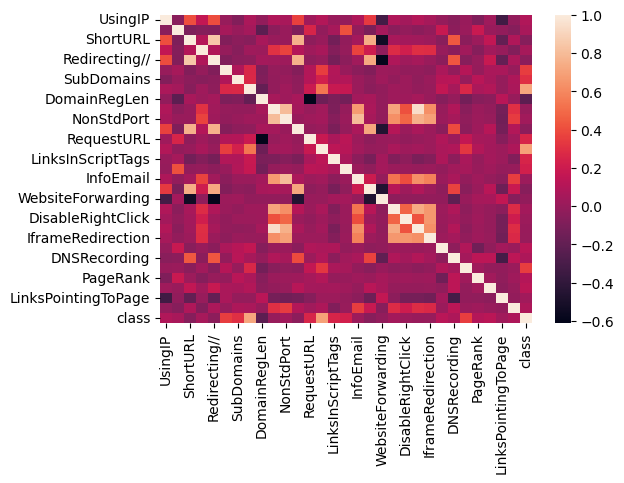

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr())